The below code is a modified version of The-Pandas-Workshop material with more examples

## Recipes
* [Selecting multiple DataFrame columns](#Selecting-multiple-DataFrame-columns)
* [Selecting columns with methods](#Selecting-columns-with-methods)
* [Ordering column names sensibly](#Ordering-column-names-sensibly)
* [Operating on the entire DataFrame](#Operating-on-the-entire-DataFrame)
* [Chaining DataFrame methods together](#Chaining-DataFrame-methods-together)
* [Working with operators on a DataFrame](#Working-with-operators-on-a-DataFrame)
* [Transposing the direction of a DataFrame operation](#Transposing-the-direction-of-a-DataFrame-operation)

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 40

# Selecting multiple DataFrame columns

Selecting a single column is accomplished by passing the desired column name as a string to the indexing operator of a DataFrame. This was covered in the Selecting a Seriesrecipe inChapter 1, Pandas Foundations. It is often necessary to focus on a subset of the current working dataset, which is accomplished by selecting multiple columns.

In [2]:
movie = pd.read_csv('data/movie.csv')
movie_actor_director = movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']]
movie_actor_director.head()

,actor_1_name,actor_2_name,actor_3_name,director_name
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan
4,Doug Walker,Rob Walker,NaN,Doug Walker


There are instances when one column of a DataFrame needs to be selected. This is done by passing a single element list to the indexing operator:

In [4]:
movie[['actor_2_name']].head() #Head by default fives top 5 values

,actor_2_name
0,Joel David Moore
1,Orlando Bloom
2,Rory Kinnear
3,Christian Bale
4,Rob Walker


In [5]:
movie[['actor_2_name']].tail() #Head by default fives bottom 5 values

,actor_2_name
4911,Daphne Zuniga
4912,Valorie Curry
4913,Maxwell Moody
4914,Daniel Henney
4915,Brian Herzlinger


In [6]:
#To get more or less values using head or tail method pass the exact number of rows we are interested in

In [7]:
movie[['actor_2_name']].head(3)

,actor_2_name
0,Joel David Moore
1,Orlando Bloom
2,Rory Kinnear


In [9]:
movie[['actor_2_name']].tail(3) #Head by default fives top 5 values

,actor_2_name
4913,Maxwell Moody
4914,Daniel Henney
4915,Brian Herzlinger


The DataFrame indexing operator is very flexible and capable of accepting a number of different objects. If a string is passed, it will return a single-dimensional Series. If a list is passed to the indexing operator, it returns a DataFrame of all the columns in the list in the specified order

Step 2 shows how to select a single column as a DataFrame rather than as a Series. Most commonly, a single column is selected with a string, resulting in a Series. When a DataFrame is the desired output, simply put the column name in a single-element list.

### There's more...

Passing a long list inside the indexing operator might cause readability issues. To help with this, you may save all your column names to a list variable first. The following code achieves the same result as step 1:

**One of the most common exceptions raised when working with pandas is KeyError. This error is mainly due to mistyping of a column or index name. This same error is raised whenever a multiple column selection is attempted without the use of a list:**

In [4]:
movie['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']

KeyError: ('actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name')

This is a common error to encounter, as it is easy to forget to place the desired columns in a list. You might be wondering what exactly is going on here. The four string names separated by commas are technically a tuple object. Normally, tuples are written with open and closing parentheses, but it isn't necessary:

Pandas is trying to find a column name exactly equal to the tuple, ('actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'). It fails and raises a KeyError.

In [11]:
cols =['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']
movie_actor_director = movie[cols] #here the newly created dataframe still refers to the original. 
#to create a new copy use below
#movie_actor_director = movie[cols].copy()
movie_actor_director.head()

,actor_1_name,actor_2_name,actor_3_name,director_name
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan
4,Doug Walker,Rob Walker,NaN,Doug Walker


# Selecting columns with methods

Although column selection is usually done directly with the indexing operator, there are some DataFrame methods that facilitate their selection in an alternative manner. `select_dtypes and filter` are two useful methods to do this.

Read in the movie dataset, and use the title of the movie to label each row. Use the get_dtype_counts method to output the number of columns with each specific data type:

In [13]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.dtypes.value_counts() #movie.get_dtype_counts() doesn't work on dataframe

float64    13
object     11
int64       3
Name: count, dtype: int64

In [16]:
#Pandas uses object data type to represent strings or mixed datatypes

Use the select_dtypes method to select only the integer columns:

In [15]:
movie.select_dtypes(include=['int']).head() #extrace only integer columns

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


If you would like to select all the numeric columns, you may simply pass the string number to the include parameter:

In [17]:
movie.select_dtypes(include=['number']).head() #get columns of all number types like ints floats etc

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,
Avatar,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


An alternative method to select columns is with the `filter method. This method is flexible and searches column names (or index labels) based on which parameter is used. Here, we use the like parameter to search for all column names that contain the exact string, facebook:`

In [18]:
movie.filter(like='facebook').head()

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes
movie_title,,,,,,
Avatar,0.0,855.0,1000.0,4834,936.0,33000
Pirates of the Caribbean: At World's End,563.0,1000.0,40000.0,48350,5000.0,0
Spectre,0.0,161.0,11000.0,11700,393.0,85000
The Dark Knight Rises,22000.0,23000.0,27000.0,106759,23000.0,164000
Star Wars: Episode VII - The Force Awakens,131.0,NaN,131.0,143,12.0,0


`The filter method allows columns to be searched through regular expressions with the regex parameter. Here, we search for all columns that have a digit somewhere in their name:`

In [19]:
movie.filter(regex='\d').head()

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
movie_title,,,,,,
Avatar,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
Pirates of the Caribbean: At World's End,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
Spectre,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
The Dark Knight Rises,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
Star Wars: Episode VII - The Force Awakens,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0


The filter method selects columns by only inspecting the column names and not the actual data values. It has three mutually exclusive parameters, items, like, and regex, only one of which can be used at a time. The like parameter takes a string and attempts to find all the column names that contain that exact string somewhere in the name. To gain more flexibility, you may use the regex parameter instead to select column names through a regular expression. This particular regular expression, \d, represents all digits from zero to nine and matches any string with at least a single digit in it.

**Note**

Regular expressions are character sequences that represent search patterns to be used to select different parts of the text. They allow for very complex and highly specific pattern matching.

### There's more...

`The filter method comes with another parameter, items, which takes a list of exact column names. This is nearly an exact duplication of the indexing operator, except that a KeyError will not be raised if one of the strings does not match a column name. For instance, movie.filter(items=['actor_1_name', 'asdf']) runs without error and returns a single column DataFrame.`

One confusing aspect of select_dtypes is its flexibility to take both strings and Python objects. The following table should clarify all the possible ways to select the many different column data types. There is no standard or preferred method of referring to data types in pandas, so it's good to be aware of both ways:

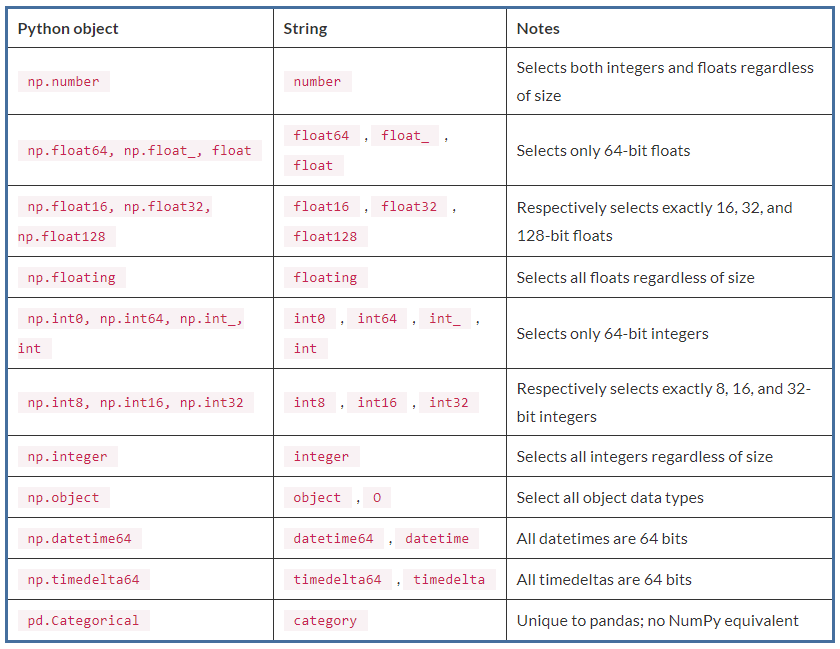

Because all integers and floats default to 64 bits, you may select them by simply using the string, int, or float as you can see from the preceding table. If you want to select all integers and floats regardless of their specific size use the string number.

In [21]:
movie.filter(items=['actor_1_name', 'actor_3_name']).head()

,actor_1_name,actor_3_name
movie_title,,
Avatar,CCH Pounder,Wes Studi
Pirates of the Caribbean: At World's End,Johnny Depp,Jack Davenport
Spectre,Christoph Waltz,Stephanie Sigman
The Dark Knight Rises,Tom Hardy,Joseph Gordon-Levitt
Star Wars: Episode VII - The Force Awakens,Doug Walker,NaN


# Ordering column names sensibly

One of the first tasks to consider after initially importing a dataset as a DataFrame is to analyze the order of the columns. This basic task is often overlooked but can make a big difference in how an analysis proceeds. Computers have no preference for column order and computations are not affected either. As human beings, we naturally view and read columns left to right, which directly impacts our interpretations of the data. Haphazard column arrangement is similar to haphazard clothes arrangement in a closet. It does no good to place suits next to shirts and pants on top of shorts. It's far easier to find and interpret information when column order is given consideration.

There are no standardized set of rules that dictate how columns should be organized within a dataset. However, it is good practice to develop a set of guidelines that you consistently follow in order to ease the analysis. This is especially true if you work with a group of analysts who share lots of datasets.

To know how to rename column names or index names please check the previous notebook

### Getting ready

The following is a simple guideline to order columns:

* Classify each column as either discrete or continuous
* Group common columns within the discrete and continuous columns
* Place the most important groups of columns first with categorical columns before continuous ones

This recipe shows you how to order the columns with this guideline. There are many possible orderings that are sensible.

In [22]:
movie = pd.read_csv('data/movie.csv')

In [23]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Output all the column names and scan for similar discrete and continuous columns:

In [24]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

The columns don't appear to have any logical ordering to them. Organize the names sensibly into lists so that the guideline from the previous section is followed:

In [25]:
disc_core = ['movie_title','title_year', 'content_rating','genres']
disc_people = ['director_name','actor_1_name', 'actor_2_name','actor_3_name']
disc_other = ['color','country','language','plot_keywords','movie_imdb_link']
cont_fb = ['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
           'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']
cont_finance = ['budget','gross']
cont_num_reviews = ['num_voted_users','num_user_for_reviews', 'num_critic_for_reviews']
cont_other = ['imdb_score','duration', 'aspect_ratio', 'facenumber_in_poster']

Concatenate all the lists together to get the final column order. Also, ensure that this list contains all the columns from the original:

In [28]:
new_col_order = disc_core + disc_people + disc_other + \
                    cont_fb + cont_finance + cont_num_reviews + cont_other
print(new_col_order)
set(movie.columns) == set(new_col_order) #check if new order has all the columns

['movie_title', 'title_year', 'content_rating', 'genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'color', 'country', 'language', 'plot_keywords', 'movie_imdb_link', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'budget', 'gross', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'imdb_score', 'duration', 'aspect_ratio', 'facenumber_in_poster']


True

Pass the list with the new column order to the indexing operator of the DataFrame to reorder the columns:

In [29]:
movie2 = movie[new_col_order]
movie2.head()

,movie_title,title_year,content_rating,genres,director_name,actor_1_name,actor_2_name,actor_3_name,color,country,language,plot_keywords,movie_imdb_link,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,budget,gross,num_voted_users,num_user_for_reviews,num_critic_for_reviews,imdb_score,duration,aspect_ratio,facenumber_in_poster
0,Avatar,2009.0,PG-13,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Color,USA,English,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,1000.0,936.0,855.0,4834,33000,237000000.0,760505847.0,886204,3054.0,723.0,7.9,178.0,1.78,0.0
1,Pirates of the Caribbean: At World's End,2007.0,PG-13,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Color,USA,English,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,563.0,40000.0,5000.0,1000.0,48350,0,300000000.0,309404152.0,471220,1238.0,302.0,7.1,169.0,2.35,0.0
2,Spectre,2015.0,PG-13,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Color,UK,English,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,0.0,11000.0,393.0,161.0,11700,85000,245000000.0,200074175.0,275868,994.0,602.0,6.8,148.0,2.35,1.0
3,The Dark Knight Rises,2012.0,PG-13,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Color,USA,English,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,22000.0,27000.0,23000.0,23000.0,106759,164000,250000000.0,448130642.0,1144337,2701.0,813.0,8.5,164.0,2.35,0.0
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,131.0,131.0,12.0,NaN,143,0,NaN,NaN,8,NaN,NaN,7.1,NaN,NaN,0.0


To select a subset of columns from a DataFrame, use a list of specific column names. For instance, movie[['movie_title', 'director_name']] creates a new DataFrame with only the movie_title and director_name columns. Selecting columns by name is the default behavior of the indexing operator for a pandas DataFrame.

Step 3 neatly organizes all of the column names into separate lists based on their type (discrete or continuous) and by how similar their data is. The most important columns, such as the title of the movie, are placed first.

Step 4 concatenates all of the lists of column names and validates that this new list contains the same exact values as the original column names. Python sets are unordered and the equality statement checks whether each member of one set is a member of the other. Manually ordering columns in this recipe is susceptible to human error as it's easy to mistakenly forget a column in the new column list.

Step 5 completes the reordering by passing the new column order as a list to the indexing operator. This new order is now much more sensible than the original.




There are alternative guidelines for ordering columns besides the simple suggestion mentioned earlier. Hadley Wickham's seminal paper on Tidy Data suggests placing the fixed variables first, followed by measured variables. As this data does not emanate from a controlled experiment, there is some flexibility in determining which variables are fixed and which ones are measured. Good candidates for measured variables are those that we would like to predict such as gross, the total revenue, or the imdb_score. For instance, in this ordering, we can mix discrete and continuous variables. It might make more sense to place the column for the number of Facebook likes directly after the name of that actor. You can, of course, come up with your own guidelines for column order as the computational parts are unaffected by it.

Quite often, you will be pulling data directly from a relational database. A very common practice for relational databases is to have the primary key (if it exists) as the first column and any foreign keys directly following it.

**Note**

Primary keys uniquely identify rows in the current table. Foreign keys uniquely identify rows in other tables.

# Operating on the entire DataFrame

In the Calling Series methods recipe in Chapter 1, Pandas Foundations, a variety of methods operated on a single column or Series of data. When these same methods are called from a DataFrame, they perform that operation for each column at once.

In [30]:
pd.options.display.max_rows = 8
movie = pd.read_csv('data/movie.csv')
movie.shape

(4916, 28)

In [31]:
movie.size

137648

In [32]:
movie.ndim

2

In [33]:
len(movie)

4916

`Use the count method to find the number of non-missing values for each column. The output is a Series that now has the old column names as its index:`

In [35]:
movie.count() #Count non-NA cells for each column or row.

color                     4897
director_name             4814
num_critic_for_reviews    4867
duration                  4901
                          ... 
actor_2_facebook_likes    4903
imdb_score                4916
aspect_ratio              4590
movie_facebook_likes      4916
Length: 28, dtype: int64

The other methods that compute summary statistics such as min, max, mean, median, and std all return similar Series, with column names in the index and their computational result as the values:

In [39]:
movie.select_dtypes(include=['number']).min() #get minimum value of all numerical columns

num_critic_for_reviews     1.00
duration                   7.00
director_facebook_likes    0.00
actor_3_facebook_likes     0.00
                           ... 
actor_2_facebook_likes     0.00
imdb_score                 1.60
aspect_ratio               1.18
movie_facebook_likes       0.00
Length: 16, dtype: float64

The `describe` method is very powerful and calculates all the descriptive statistics and quartiles in the preceding steps all at once. The end result is a DataFrame with the descriptive statistics as its index:

In [41]:
movie.describe() #ignores non numerical columns

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4867.000000,4901.000000,4814.000000,4893.000000,4909.000000,4.054000e+03,4.916000e+03,4916.000000,4903.000000,4895.000000,4.432000e+03,4810.000000,4903.000000,4916.000000,4590.000000,4916.000000
mean,137.988905,107.090798,691.014541,631.276313,6494.488491,4.764451e+07,8.264492e+04,9579.815907,1.377320,267.668846,3.654749e+07,2002.447609,1621.923516,6.437429,2.222349,7348.294142
std,120.239379,25.286015,2832.954125,1625.874802,15106.986884,6.737255e+07,1.383222e+05,18164.316990,2.023826,372.934839,1.002427e+08,12.453977,4011.299523,1.127802,1.402940,19206.016458
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,5.019656e+06,8.361750e+03,1394.750000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,366.000000,982.000000,2.504396e+07,3.313250e+04,3049.000000,1.000000,153.000000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,159.000000
75%,191.000000,118.000000,189.750000,633.000000,11000.000000,6.110841e+07,9.377275e+04,13616.750000,2.000000,320.500000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


It is possible to specify exact quantiles in the describe method using the percentiles parameter:


In [42]:
pd.options.display.max_rows = 10

In [43]:
movie.describe(percentiles=[.01, .3, .99]) #default percentiles are 25, 50, 75. To change it, pass a lit of percentiles

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4867.000000,4901.000000,4814.000000,4893.000000,4909.000000,4.054000e+03,4.916000e+03,4916.000000,4903.000000,4895.000000,4.432000e+03,4810.000000,4903.000000,4916.000000,4590.000000,4916.000000
mean,137.988905,107.090798,691.014541,631.276313,6494.488491,4.764451e+07,8.264492e+04,9579.815907,1.377320,267.668846,3.654749e+07,2002.447609,1621.923516,6.437429,2.222349,7348.294142
std,120.239379,25.286015,2832.954125,1625.874802,15106.986884,6.737255e+07,1.383222e+05,18164.316990,2.023826,372.934839,1.002427e+08,12.453977,4011.299523,1.127802,1.402940,19206.016458
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
1%,2.000000,43.000000,0.000000,0.000000,6.080000,8.474800e+03,5.300000e+01,6.000000,0.000000,1.940000,6.000000e+04,1951.000000,0.000000,3.100000,1.330000,0.000000
30%,60.000000,95.000000,11.000000,176.000000,694.000000,7.914069e+06,1.186450e+04,1684.500000,0.000000,80.000000,8.000000e+06,2000.000000,345.000000,6.000000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,366.000000,982.000000,2.504396e+07,3.313250e+04,3049.000000,1.000000,153.000000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,159.000000
99%,546.680000,189.000000,16000.000000,11000.000000,44920.000000,3.264128e+08,6.815846e+05,62413.900000,8.000000,1999.240000,2.000000e+08,2016.000000,17000.000000,8.500000,4.000000,93850.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [44]:
pd.options.display.max_rows = 8

In [45]:
movie.isnull().sum()

color                      19
director_name             102
num_critic_for_reviews     49
duration                   15
                         ... 
actor_2_facebook_likes     13
imdb_score                  0
aspect_ratio              326
movie_facebook_likes        0
Length: 28, dtype: int64

Step 1 gives basic information on the size of the dataset. The shape attribute returns a two-element tuple of the number of rows and columns. The size attribute returns the total number of elements in the DataFrame, which is just the product of the number of rows and columns. The ndim attribute returns the number of dimensions, which is two for all DataFrames. Pandas defines the built-in len function to return the number of rows.

The methods in step 2 and step 3 aggregate each column down to a single number. Each column name is now the index label in a Series with its aggregated result as the corresponding value.

If you look closely, you will notice that the output from step 3 is missing all the object columns from step 2. The reason for this is that there are missing values in the object columns and pandas does not know how to compare a string value with a missing value. It silently drops all of the columns for which it is unable to compute a minimum.

**Note**

In this context, silently means that no error was raised and no warning thrown. This is a bit dangerous and requires users to have a good familiarity with pandas.

The numeric columns have missing values as well but have a result returned. By default, pandas handles missing values in numeric columns by skipping them. It is possible to change this behavior by setting the skipna parameter to False. This will cause pandas to return NaN for all these aggregation methods if there exists at least a single missing value.

The describe method displays the main summarizations all at once and can expand its summary to include more quantiles by passing a list of numbers between 0 and 1 to the percentiles parameter. It defaults to showing information on just the numeric columns. See the Developing a data analysis routine recipe for more on the describe method.



`To see how the skipna parameter affects the outcome, we can set its value to False and rerun step 3 from the preceding recipe. Only numeric columns without missing values will calculate a result:`



In [48]:
movie.select_dtypes(include=['number']).min(skipna=False) #considers Nan as the minimum value

num_critic_for_reviews     NaN
duration                   NaN
director_facebook_likes    NaN
actor_3_facebook_likes     NaN
                          ... 
actor_2_facebook_likes     NaN
imdb_score                 1.6
aspect_ratio               NaN
movie_facebook_likes       0.0
Length: 16, dtype: float64

# Chaining DataFrame methods together

Whether you believe method chaining is a good practice or not, it is quite common to encounter it during data analysis with pandas. The Chaining Series methods together recipe in Chapter 1, Pandas Foundations, showcased several examples of chaining Series methods together. All the method chains in this chapter will begin from a DataFrame. One of the keys to method chaining is to know the exact object being returned during each step of the chain. In pandas, this will nearly always be a DataFrame, Series, or scalar value.

To get a count of the missing values, the isnull method must first be called to change each DataFrame value to a boolean. Let's call this method on the movie dataset:

In [49]:
movie = pd.read_csv('data/movie.csv')
movie.isnull().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,True,True,True,True,True,False,False,True,False


We will chain the sum method that interprets True/False booleans as 1/0. Notice that a Series is returned:

In [51]:
movie.isnull().sum().head() #for each column check if a value is missing, count all missing values and show top 5 columns

color                       19
director_name              102
num_critic_for_reviews      49
duration                    15
director_facebook_likes    102
dtype: int64

We can go one step further and take the sum of this Series and return the count of the total number of missing values in the entire DataFrame as a scalar value:

In [52]:
movie.isnull().sum().sum() 

2656

A slight deviation is to determine whether there are any missing values in the DataFrame. We use the any method here twice in succession to do this:

In [54]:
movie.isnull().any().any() #if there is atleast one missing value in dataframe it returns True

True

## How it works...

The isnull method returns a DataFrame the same size as the calling DataFrame but with all values transformed to booleans. See the counts of the following data types to verify this:



In [62]:
movie.isnull().dtypes.value_counts() 

bool    28
Name: count, dtype: int64

As booleans evaluate numerically as 0/1, it is possible to sum them by column, as done in step 2. The resulting Series itself also has a sum method, which gets us the grand total of missing values in the DataFrame.

In step 4, the any DataFrame method returns a Series of booleans indicating if there exists at least one True for each column. The any method is chained again on this resulting Series of booleans to determine if any of the columns have missing values. If step 4 evaluates as True, then there is at least one missing value in the entire DataFrame.

## There's more...

Most of the columns in the movie dataset with object data type contain missing values. By default, the aggregation methods, min, max, and sum, do not return anything, as seen in the following code snippet, which selects three object columns and attempts to find the maximum value of each one:

In [63]:
movie[['color', 'movie_title', 'color']].max()

TypeError: '>=' not supported between instances of 'str' and 'float'

To force pandas to return something for each column, we must fill in the missing values. Here, we choose an empty string:

In [64]:
movie.select_dtypes(['object']).fillna('').max()

color                                                          Color
director_name                                          Étienne Faure
actor_2_name                                           Zubaida Sahar
genres                                                       Western
                                         ...                        
movie_imdb_link    http://www.imdb.com/title/tt5574490/?ref_=fn_t...
language                                                        Zulu
country                                                 West Germany
content_rating                                                     X
Length: 12, dtype: object

For purposes of readability, method chains are often written as one method call per line with the backslash character at the end to escape new lines. This makes it easier to read and insert comments on what is returned at each step of the chain:


`movie.select_dtypes(['object']) \
         .fillna('') \
         .min()`

# Working with operators on a DataFrame

A primer on operators was given in the Working with operators on a Series recipe from Chapter 1, Pandas Foundations, which will be helpful here. The Python arithmetic and comparison operators work directly on DataFrames, as they do on Series.

### Getting ready

When a DataFrame operates directly with one of the arithmetic or comparison operators, each value of each column gets the operation applied to it. Typically, when an operator is used with a DataFrame, the columns are either all numeric or all object (usually strings). If the DataFrame does not contain homogeneous data, then the operation is likely to fail. Let's see an example of this failure with the college dataset, which contains both numeric and object data types. Attempting to add 5 to each value of the DataFrame raises a TypeError as integers cannot be added to strings:



In [34]:
college = pd.read_csv('data/college.csv')
college + 5

TypeError: Could not operate 5 with block values Can't convert 'int' object to str implicitly

To successfully use an operator with a DataFrame, first select homogeneous data. For this recipe, we will select all the columns that begin with UGDS_. These columns represent the fraction of undergraduate students by race. To get started, we import the data and use the institution name as the label for our index, and then select the columns we desire with the filter method:

In [65]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')

In [66]:
college_ugds_.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


This recipe uses multiple operators with a DataFrame to round the undergraduate columns to the nearest hundredth. We will then see how this result is equivalent to the round method.

To begin our rounding adventure with operators, we will first add .00501 to each value of college_ugds_:

In [68]:
college_ugds_.head() + .00501 #Now it works because all our columns are numerical

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03831,0.94031,0.01051,0.00691,0.00741,0.00691,0.00501,0.01091,0.01881
University of Alabama at Birmingham,0.59721,0.26501,0.03331,0.05681,0.00721,0.00571,0.04181,0.02291,0.01501
Amridge University,0.30401,0.42421,0.01191,0.00841,0.00501,0.00501,0.00501,0.00501,0.27651
University of Alabama in Huntsville,0.70381,0.13051,0.04321,0.04261,0.01931,0.00521,0.02221,0.03821,0.04001
Alabama State University,0.02081,0.92581,0.01711,0.00691,0.00601,0.00561,0.01481,0.02931,0.01871


Use the floor division operator, //, to round to the nearest whole number percentage:

In [69]:
(college_ugds_.head() + .00501) // .01

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,3.0,94.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
University of Alabama at Birmingham,59.0,26.0,3.0,5.0,0.0,0.0,4.0,2.0,1.0
Amridge University,30.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0
University of Alabama in Huntsville,70.0,13.0,4.0,4.0,1.0,0.0,2.0,3.0,4.0
Alabama State University,2.0,92.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0


To complete the rounding exercise, divide by 100:

In [70]:
college_ugds_op_round = (college_ugds_ + .00501) // .01 / 100
college_ugds_op_round.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.00,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.00,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.00,0.0,0.00,0.00,0.27
University of Alabama in Huntsville,0.70,0.13,0.04,0.04,0.01,0.0,0.02,0.03,0.04
Alabama State University,0.02,0.92,0.01,0.00,0.00,0.0,0.01,0.02,0.01


Now use the round DataFrame method to do the rounding automatically for us. NumPy rounds numbers that are exactly halfway between either side to the even side. Due to this, we add a small fraction before rounding:

In [72]:
college_ugds_round = (college_ugds_ + .00001).round(2) #Round to the nearest 2 decimal places
college_ugds_round.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.00,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.00,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.00,0.0,0.00,0.00,0.27
University of Alabama in Huntsville,0.70,0.13,0.04,0.04,0.01,0.0,0.02,0.03,0.04
Alabama State University,0.02,0.92,0.01,0.00,0.00,0.0,0.01,0.02,0.01


Use the equals DataFrame method to test the equality of two DataFrames:

In [73]:
college_ugds_op_round.equals(college_ugds_round)

True

Step 1 uses the plus operator, which attempts to add a scalar value to each value of each column of the DataFrame. As the columns are all numeric, this operation works as expected. There are some missing values in each of the columns but they stay missing after the operation.

Mathematically, adding .005 should be enough so that the floor division in the next step correctly rounds to the nearest whole percentage. The trouble appears because of the inexactness of floating point numbers:

In [74]:
.045 + .005

0.049999999999999996

There is an extra .00001 added to each number to ensure that the floating point representation has the first four digits the same as the actual value. This works because the maximum precision of all the points in the dataset is four decimal places.

Step 2 applies the floor division operator, //, to all the values in the DataFrame. As we are dividing by a fraction, in essence, it is multiplying each value by 100 and truncating any decimals. Parentheses are needed around the first part of the expression, as floor division has higher precedence than addition. Step 3 uses the division operator to return the decimal to the correct position.

In step 4, we reproduce the previous steps with the round method. Before we can do this, we must again add an extra .00001 to each DataFrame value for a different reason from step 1. NumPy and Python 3 round numbers that are exactly halfway between either side to the even number. This ties to the even (http://bit.ly/2x3V5TU) technique is not usually what is formally taught in schools. It does not consistently bias numbers to the higher side (http://bit.ly/2zhsPy8).

It is necessary here to round up so that both DataFrame values are equal. The equals method determines if all the elements and indexes between two DataFrames are exactly the same and returns a boolean.

## There's more...

Just as with Series, DataFrames have method equivalents of the operators. You may replace the operators with their method equivalents:



In [75]:
college_ugds_op_round_methods = college_ugds_.add(.00501).floordiv(.01).div(100)

# Comparing missing values

`Pandas uses the NumPy NaN (np.nan) object to represent a missing value. This is an unusual object, as it is not equal to itself. Even Python's None object evaluates as True when compared to itself:`

In [76]:
np.nan == np.nan

False

In [77]:
None == None

True

All other comparisons against np.nan also return False, except not equal to:



In [78]:
5 > np.nan

False

In [79]:
np.nan > 5

False

In [80]:
5 != np.nan

True

`Series and DataFrames use the equals operator, ==, to make element-by-element comparisons that return an object of the same size. This recipe shows you how to use the equals operator, which is very different from the equals method.`

As in the previous recipe, the columns representing the fraction of each race of undergraduate students from the college dataset will be used:



In [81]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')

To get an idea of how the equals operator works, let's compare each element to a scalar value:


In [82]:
college_ugds_.head() == .0019

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,False,False,True,False,True,False,False,False
University of Alabama at Birmingham,False,False,False,False,False,False,False,False,False
Amridge University,False,False,False,False,False,False,False,False,False
University of Alabama in Huntsville,False,False,False,False,False,False,False,False,False
Alabama State University,False,False,False,True,False,False,False,False,False


This works as expected but becomes problematic whenever you attempt to compare DataFrames with missing values. This same equals operator may be used to compare two DataFrames with one another on an element-by-element basis. Take, for instance, college_ugds_ compared against itself, as follows:

In [83]:
college_self_compare = college_ugds_ == college_ugds_
college_self_compare.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,True,True,True,True,True,True,True,True,True
University of Alabama at Birmingham,True,True,True,True,True,True,True,True,True
Amridge University,True,True,True,True,True,True,True,True,True
University of Alabama in Huntsville,True,True,True,True,True,True,True,True,True
Alabama State University,True,True,True,True,True,True,True,True,True


At first glance, all the values appear to be equal, as you would expect. However, using the all method to determine if each column contains only True values yields an unexpected result:


In [84]:
college_self_compare.all()

UGDS_WHITE    False
UGDS_BLACK    False
UGDS_HISP     False
UGDS_ASIAN    False
              ...  
UGDS_NHPI     False
UGDS_2MOR     False
UGDS_NRA      False
UGDS_UNKN     False
Length: 9, dtype: bool

This happens because missing values do not compare equally with one another. If you tried to count missing values using the equal operator and summing up the boolean columns, you would get zero for each one:


In [85]:
(college_ugds_ == np.nan).sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
             ..
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
Length: 9, dtype: int64

The primary way to count missing values uses the isnull method:

In [86]:
college_ugds_.isnull().sum()

UGDS_WHITE    661
UGDS_BLACK    661
UGDS_HISP     661
UGDS_ASIAN    661
             ... 
UGDS_NHPI     661
UGDS_2MOR     661
UGDS_NRA      661
UGDS_UNKN     661
Length: 9, dtype: int64

The correct way to compare two entire DataFrames with one another is not with the equals operator but with the equals method:
`college_ugds_.equals(college_ugds_)`

Step 1 compares a DataFrame to a scalar value while step 2 compares a DataFrame with another DataFrame. Both operations appear to be quite simple and intuitive at first glance. The second operation is actually checking whether the DataFrames are identically labeled indexes and thus the same number of elements. The operation will fail if this isn't the case. See the Producing Cartesian products recipe from Chapter 6, Index Alignment, for more information.

Step 3 verifies that none of the columns in the DataFrames are equivalent to each other. Step 4 further shows the non-equivalence of np.nan and itself. Step 5 verifies that there are indeed missing values in the DataFrame. Finally, step 6 shows the correct way to compare DataFrames with equals method, which always returns a boolean scalar value.

### There's more...

All the comparison operators have method counterparts that allow for more functionality. Somewhat confusingly, the eq DataFrame method does element-by-element comparison, just like the equals operator.The eq method is not at all the same as the equals method. It merely does a similar task as the equals operator. The following code duplicates step 1:

In [87]:
college_ugds_.eq(.0019).head() # same as college_ugds_ == .0019 

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,False,False,True,False,True,False,False,False
University of Alabama at Birmingham,False,False,False,False,False,False,False,False,False
Amridge University,False,False,False,False,False,False,False,False,False
University of Alabama in Huntsville,False,False,False,False,False,False,False,False,False
Alabama State University,False,False,False,True,False,False,False,False,False


Inside the pandas.testing sub-package, a function exists that developers must use when creating unit tests. The assert_frame_equal function raises an AssertionError if two DataFrames are not equal. It returns None if the two passed frames are equal:

In [88]:
from pandas.testing import assert_frame_equal

In [89]:
assert_frame_equal(college_ugds_, college_ugds_)

# Transposing the direction of a DataFrame operation

Many DataFrame methods have an axis parameter. This important parameter controls the direction in which the operation takes place. Axis parameters can only be one of two values, either 0 or 1, and are aliased respectively as the strings index and columns.

### Getting ready

Nearly all DataFrame methods default the axis parameter to 0/index. This recipe shows you how to invoke the same method, but with the direction of its operation transposed. To simplify the exercise, only the columns that reference the percentage race of each school from the college dataset will be used.

### How to do it...

Read in the college dataset; the columns that begin with UGDS_ represent the percentage of the undergraduate students of a particular race. Use the filter method to select these columns:

In [90]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')
college_ugds_.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


Now that the DataFrame contains homogenous column data, operations can be sensibly done both vertically and horizontally. The count method returns the number of non-missing values. By default, its axis parameter is set to 0:

In [91]:
college_ugds_.count()

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
              ... 
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
Length: 9, dtype: int64

**Note**

As the axis parameter is almost always set to 0, it is not necessary to do the following, but for purposes of understanding, Step 2 is equivalent to both college_ugds_.count(axis=0) and college_ugds_.count(axis='index').

Changing the axis parameter to 1/columns transposes the operation so that each row of data has a count of its non-missing values:

In [92]:
college_ugds_.count(axis=0)

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
              ... 
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
Length: 9, dtype: int64

In [93]:
college_ugds_.count(axis='index')

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
              ... 
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
Length: 9, dtype: int64

In [94]:
college_ugds_.count(axis='columns').head()

INSTNM
Alabama A & M University               9
University of Alabama at Birmingham    9
Amridge University                     9
University of Alabama in Huntsville    9
Alabama State University               9
dtype: int64

Instead of counting non-missing values, we can sum all the values in each row. Each row of percentages should add up to 1. The sum method may be used to verify this:


In [95]:
college_ugds_.sum(axis='columns').head()

INSTNM
Alabama A & M University               1.0000
University of Alabama at Birmingham    0.9999
Amridge University                     1.0000
University of Alabama in Huntsville    1.0000
Alabama State University               1.0000
dtype: float64

To get an idea of the distribution of each column, the median method can be used:

In [96]:
college_ugds_.median(axis='index')

UGDS_WHITE    0.55570
UGDS_BLACK    0.10005
UGDS_HISP     0.07140
UGDS_ASIAN    0.01290
               ...   
UGDS_NHPI     0.00000
UGDS_2MOR     0.01750
UGDS_NRA      0.00000
UGDS_UNKN     0.01430
Length: 9, dtype: float64

The direction of operation is one of the more confusing aspects of pandas, and threads abound on the internet to discuss its interpretation. Many novice pandas users have difficulty remembering the meaning of the axis parameter. Luckily, there are only two potential directions that an operation can complete in pandas. A simple brute force solution of trying both directions until achieving the desired result is one possibility. I remember the meaning of the axis parameter by thinking of 1 as looking like a column, and any operation with axis=1 returns a new column of data (has the same number of items that a column does).

This is confirmed in step 3, where the result (without the head method) returns a new column of data and could be easily appended as a column to the DataFrame, if necessary. The other steps with axis equal to 1/index return a new row of data.

## There's more
The cumsum method with axis=1 accumulates the race percentages across each row. It gives a slightly different view of the data. For example, it is very easy to see the exact percentage of white, black, and Hispanic together for each school:

In [97]:
college_ugds_cumsum = college_ugds_.cumsum(axis=1)
college_ugds_cumsum.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9686,0.9741,0.9760,0.9784,0.9803,0.9803,0.9862,1.0000
University of Alabama at Birmingham,0.5922,0.8522,0.8805,0.9323,0.9345,0.9352,0.9720,0.9899,0.9999
Amridge University,0.2990,0.7182,0.7251,0.7285,0.7285,0.7285,0.7285,0.7285,1.0000
University of Alabama in Huntsville,0.6988,0.8243,0.8625,0.9001,0.9144,0.9146,0.9318,0.9650,1.0000
Alabama State University,0.0158,0.9366,0.9487,0.9506,0.9516,0.9522,0.9620,0.9863,1.0000


In [98]:
college_ugds_cumsum.sort_values('UGDS_HISP', ascending=False)

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
New Beginning College of Cosmetology,0.8957,0.9305,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
Virginia University of Lynchburg,0.0120,0.9921,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
Turning Point Beauty College,0.1915,0.2341,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
First Coast Barber Academy,0.1667,0.9445,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
...,...,...,...,...,...,...,...,...,...
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bay Area Medical Academy - San Jose Satellite Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excel Learning Center-San Antonio South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Determining college campus diversity
Many articles are written every year on the different aspects and impacts of diversity on college campuses. Various organizations have developed metrics attempting to measure diversity. US News is a leader in providing rankings for many different categories of colleges, with diversity being one of them. Their top 10 diverse colleges with Diversity Index are given as follows:

In [99]:
pd.read_csv('data/college_diversity.csv', index_col='School')

,Diversity Index
School,
"Rutgers University--Newark Newark, NJ",0.76
"Andrews University Berrien Springs, MI",0.74
"Stanford University Stanford, CA",0.74
"University of Houston Houston, TX",0.74
...,...
"San Francisco State University San Francisco, CA",0.73
"University of Illinois--Chicago Chicago, IL",0.73
"New Jersey Institute of Technology Newark, NJ",0.72
"Texas Woman's University Denton, TX",0.72


### Getting ready

Our college dataset classifies race into nine different categories. When trying to quantify something without an obvious definition, such as diversity, it helps to start with something very simple. In this recipe, our diversity metric will equal the count of the number of races having greater than 15% of the student population.

### How to do it...

 Read in the college dataset, and filter for just the undergraduate race columns:

In [100]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')
college_ugds_.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


Many of these colleges have missing values for all their race columns. We can count all the missing values for each row and sort the resulting Series from the highest to lowest. This will reveal the colleges that have missing values:


In [101]:
college_ugds_.isnull().sum(axis=1).sort_values(ascending=False).head()

INSTNM
Excel Learning Center-San Antonio South              9
Western State College of Law at Argosy University    9
Albany Law School                                    9
Albany Medical College                               9
A T Still University of Health Sciences              9
dtype: int64

Now that we have seen the colleges that are missing all their race columns, we can use the dropna method to drop all rows that have all nine race percentages missing. We can then count the remaining missing values:


In [102]:
college_ugds_ = college_ugds_.dropna(how='all')

In [103]:
college_ugds_.isnull().sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
             ..
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
Length: 9, dtype: int64

There are no missing values left in the dataset. We can now calculate our diversity metric. To get started, we will use the greater than or equal DataFrame method, ge, to convert each value to a boolean:

In [104]:
college_ugds_.ge(.15).head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,True,False,False,False,False,False,False,False
University of Alabama at Birmingham,True,True,False,False,False,False,False,False,False
Amridge University,True,True,False,False,False,False,False,False,True
University of Alabama in Huntsville,True,False,False,False,False,False,False,False,False
Alabama State University,False,True,False,False,False,False,False,False,False


From here, we can use the sum method to count the True values for each college. Notice that a Series is returned:

In [105]:
diversity_metric = college_ugds_.ge(.15).sum(axis='columns')
diversity_metric.head()

INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    2
Amridge University                     3
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

To get an idea of the distribution, let's use the value_counts method on this Series:

In [106]:
diversity_metric.value_counts()

1    3042
2    2884
3     876
4      63
0       7
5       2
Name: count, dtype: int64

Amazingly, two schools have more than 15% in five different race categories. Let's sort the diversity_metric Series to find out which ones they are:

In [107]:
diversity_metric.sort_values(ascending=False).head()

INSTNM
Central Texas Beauty College-Temple                               5
Regency Beauty Institute-Austin                                   5
Westwood College-O'Hare Airport                                   4
Regency Beauty Institute-Pasadena                                 4
Soma Institute-The National School of Clinical Massage Therapy    4
dtype: int64

It seems a little suspicious that schools can be that diverse. Let's look at the raw percentages from these top two schools. The .loc indexer is used to specifically select based on the index label:

In [108]:
college_ugds_.loc[['Regency Beauty Institute-Austin', 
                          'Central Texas Beauty College-Temple']]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Regency Beauty Institute-Austin,0.1867,0.2133,0.1600,0.0000,0.0,0.0,0.1733,0.0,0.2667
Central Texas Beauty College-Temple,0.1616,0.2323,0.2626,0.0202,0.0,0.0,0.1717,0.0,0.1515


It appears that several categories were aggregated into the unknown and two or more races column. Regardless of this, they both appear to be quite diverse. We can see how the top 10 US News schools fared with this basic diversity metric:

In [109]:
us_news_top = ['Rutgers University-Newark', 
               'Andrews University', 
               'Stanford University', 
               'University of Houston',
               'University of Nevada-Las Vegas']

In [110]:
diversity_metric.loc[us_news_top]

INSTNM
Rutgers University-Newark         4
Andrews University                3
Stanford University               3
University of Houston             3
University of Nevada-Las Vegas    3
dtype: int64

Step 2 counts and then displays the schools with the highest number of missing values. As there are nine columns in the DataFrame, the maximum number of missing values per school is nine. Many schools are missing values for each column. Step 3 removes rows that have all their values missing. The dropna method in step 3 has the how parameter, which is defaulted to the string any but may also be changed to all. When set to any, it drops rows that contain one or more missing values. When set to all, it only drops rows where all values are missing.

In this case, we conservatively drop rows that are missing all values. This is because it's possible that some missing values simply represent 0 percent. This did not happen to be the case here, as there were no missing values after the dropna was performed. If there were still missing values, we could have run the fillna(0) method to fill all the remaining values with 0.

Step 4 begins our diversity metric calculation using the greater than or equal to method, ge. This results in a DataFrame of all booleans, which is summed horizontally by setting axis='columns'.

The value_counts method is used in step 5 to produce a distribution of our diversity metric. It is quite rare for schools to have three races with 15% or more of the undergraduate student population. Step 7 and step 8 find two schools that are the most diverse based on our metric. Although they are diverse, it appears that many of the races are not fully accounted for and are defaulted into the unknown and two or more categories.

Step 9 selects the top five schools from the US News article. It then selects their diversity metric from our newly created Series. It turns out that these schools also score highly with our simple ranking system.

## There's more...

Alternatively, we can find the schools that are least diverse by ordering them by their maximum race percentage:

In [111]:
college_ugds_.max(axis=1).sort_values(ascending=False).head(10)

INSTNM
Caribbean University-Ponce                                        1.0
Brighton Institute of Cosmetology                                 1.0
Mesivta Torah Vodaath Rabbinical Seminary                         1.0
Rabbinical College Telshe                                         1.0
                                                                 ... 
Lake Career and Technical Center                                  1.0
Leon Studio One School of Hair Design & Career Training Center    1.0
Dewey University-Hato Rey                                         1.0
Columbia Central University-Caguas                                1.0
Length: 10, dtype: float64

We can also determine if any school has all nine race categories exceeding 1:

In [113]:
college_ugds_.loc['Talmudical Seminary Oholei Torah']

UGDS_WHITE    1.0
UGDS_BLACK    0.0
UGDS_HISP     0.0
UGDS_ASIAN    0.0
             ... 
UGDS_NHPI     0.0
UGDS_2MOR     0.0
UGDS_NRA      0.0
UGDS_UNKN     0.0
Name: Talmudical Seminary Oholei Torah, Length: 9, dtype: float64

In [114]:
(college_ugds_ > .01).all(axis=1).any()

True